# GPS coords plot using a kalman filter

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
import math
import random

%matplotlib inline

In [214]:
LAT_TO_M = 111176.46161222676
LONG_TO_M = 75643.46720256942
GEO_MEAN_WINDOW = 3

In [215]:
df = pd.read_csv('towork1.csv')

In [216]:
#df['lat'] = pd.rolling_mean(df['lat'], GEO_MEAN_WINDOW)
#df['long'] = pd.rolling_mean(df['long'], GEO_MEAN_WINDOW)

In [217]:
df['dt'] = [datetime.datetime.fromtimestamp(x/1000) for x in df['timestamp'].values]
df['Ddt'] = df.diff()['dt'].dt.total_seconds()
df['Dlat'] = df.diff()['lat']
df['Dlong'] = df.diff()['long']


df['Dlat'] = df['Dlat'] * LAT_TO_M
df['Dlong'] = df['Dlong'] * LONG_TO_M
df['d_euc'] = [math.sqrt(a**2 + b**2) for (a, b) in zip(df['Dlat'].values, df['Dlong'].values)]
df['a_sum'] = [math.sqrt(x**2 + y**2 + x**2) for (x, y, z) in zip(df['ax'], df['ay'], df['az'])]

In [218]:
df

,timestamp,lat,long,ax,ay,az,acc,dt,Ddt,Dlat,Dlong,d_euc,a_sum
0,1505466134594,47.524336,19.072785,0.312994,-0.294937,1.003267,20.462000,2017-09-15 11:02:14.594,NaN,NaN,NaN,NaN,0.531900
1,1505466135885,47.524336,19.072785,0.126211,-0.419059,0.638704,14.501000,2017-09-15 11:02:15.885,1.291,0.000000,0.000000,0.000000,0.455487
2,1505466136875,47.524346,19.072800,0.327460,-0.796190,-1.400222,12.084000,2017-09-15 11:02:16.875,0.990,1.056176,1.164909,1.572426,0.921075
3,1505466137405,47.524351,19.072809,-1.005648,-0.410647,2.854742,10.435000,2017-09-15 11:02:17.405,0.530,0.611471,0.673227,0.909467,1.480300
4,1505466138386,47.524354,19.072814,0.354161,0.383063,3.877467,10.000000,2017-09-15 11:02:18.386,0.981,0.355765,0.393346,0.530367,0.630553
5,1505466139346,47.524360,19.072815,0.371055,-0.527071,1.475636,10.000000,2017-09-15 11:02:19.346,0.960,0.622588,0.090772,0.629171,0.743753
6,1505466140326,47.524360,19.072816,0.770285,1.784625,1.897407,10.000000,2017-09-15 11:02:20.326,0.980,0.000000,0.007564,0.007564,2.090829
7,1505466141346,47.524363,19.072816,-0.690460,-0.407285,1.184003,10.000000,2017-09-15 11:02:21.346,1.020,0.366882,0.052950,0.370684,1.057994
8,1505466142365,47.524372,19.072821,0.086264,-0.059158,0.749231,10.000000,2017-09-15 11:02:22.365,1.019,0.967235,0.370653,1.035822,0.135583
9,1505466143475,47.524382,19.072827,0.031463,-0.012306,0.624046,10.000000,2017-09-15 11:02:23.475,1.110,1.100647,0.438732,1.184867,0.046166


In [247]:
slice = df[['lat', 'long', 'Ddt']][2:].values
slice[:,0] = slice[:,0] * LAT_TO_M
slice[:,1] = slice[:,1] * LONG_TO_M

slice[:,0] = slice[:,0] - np.min(slice[:,0])
slice[:,1] = slice[:,1] - np.min(slice[:,1])


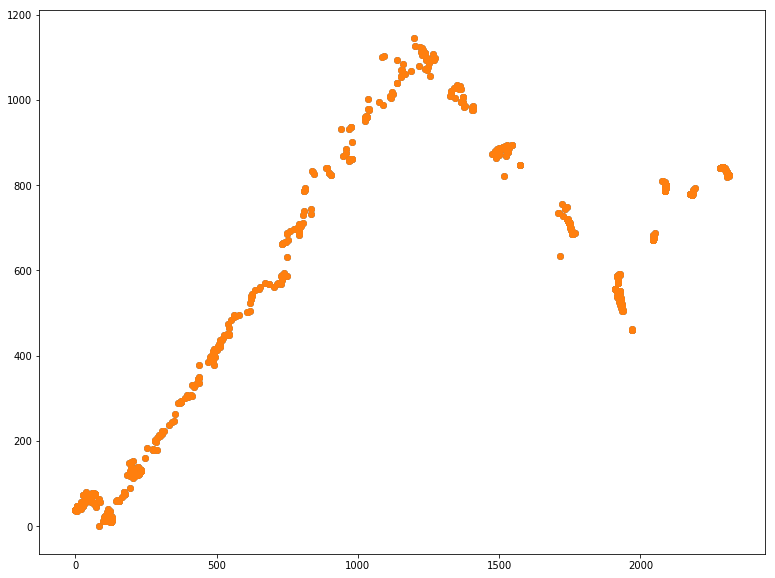

In [248]:
plt.figure(figsize=(13,10))
plt.scatter(slice[:,0], slice[:,1])
plt.scatter(slice[:,0], slice[:,1])

In [237]:
### simulation!!
#slice = np.array([[x*5.3,x*3.2 + random.random()*60-30, random.random()+1] for x in range (100)])


In [249]:
class Kalman():
    def __init__(self):
        self.x = np.array([[0], 
                           [0],
                           [0],
                           [0]]) # initial state (location and velocity)
        self.reset()
        
    def reset(self):
        self.P = np.array([[1000., 0., 0., 0.], 
                           [0., 1000., 0., 0.],
                           [0., 0., 1000., 0.],
                           [0., 0., 0., 1000.]]) # initial uncertainty
        
        self.u = np.array([[0], [0], [0], [0]]) # external motion
        
        self.F = np.array([[1, 0, 1, 0], 
                           [0, 1, 0, 1],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]]) # next state function
        
        self.H = np.array([[1, 0, 0, 0] # X to measurement mapping matrix (H * x = measurement)
                          ,[0, 1, 0, 0]])
        
        self.R = np.array([[15, 0 ]
                           ,[0, 15]]) # measurement uncertainty
        
        self.I = np.array([[1, 0, 0, 0], 
                           [0, 1, 0, 0],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]]) # identity matrix      
        
    def feed_meas(self, measurement, dt):
        z = measurement.reshape((2,-1)) # z - measurement matrix

        # dt into the state transition matrix
        self.F[0, 2] = dt;
        self.F[1, 3] = dt;
        #print(z, dt)
        #return
    
        y = z - np.dot(self.H, self.x) # error : previous state - measurement X measurement matrix

        #print ('y', y)
        S = np.dot(np.dot(self.H, self.P), self.H.transpose()) + self.R
        K = np.dot(np.dot(self.P, self.H.transpose()), np.linalg.inv(S)) # kalman gain

        #print ('K', K)
        self.x = self.x + np.dot(K, y) # new state : x + kalman gain X error
        self.P = np.dot((self.I - np.dot(K, self.H)), self.P) # adjusting uncertainty covariance

        
    def predict_next_state(self):
        
        
        #print ('F', self.F)
        #print ('x', self.x)
        
        self.x = np.dot(self.F, self.x) + self.u # new state : movement matrix X current state + movement
        self.P = np.dot(np.dot(self.F, self.P), self.F.transpose()) # adjusting covar matrix 
    
    

In [275]:
kk = Kalman()
l = []
for i, m in enumerate(slice):
    
    if i % 100 == 0 : kk.reset()

    kk.feed_meas(m[0:2], m[2])
    kk.predict_next_state()
    l.append(kk.x)

l = np.array(l).reshape(-1, 4)

[-500, 3000, -100, 1700]

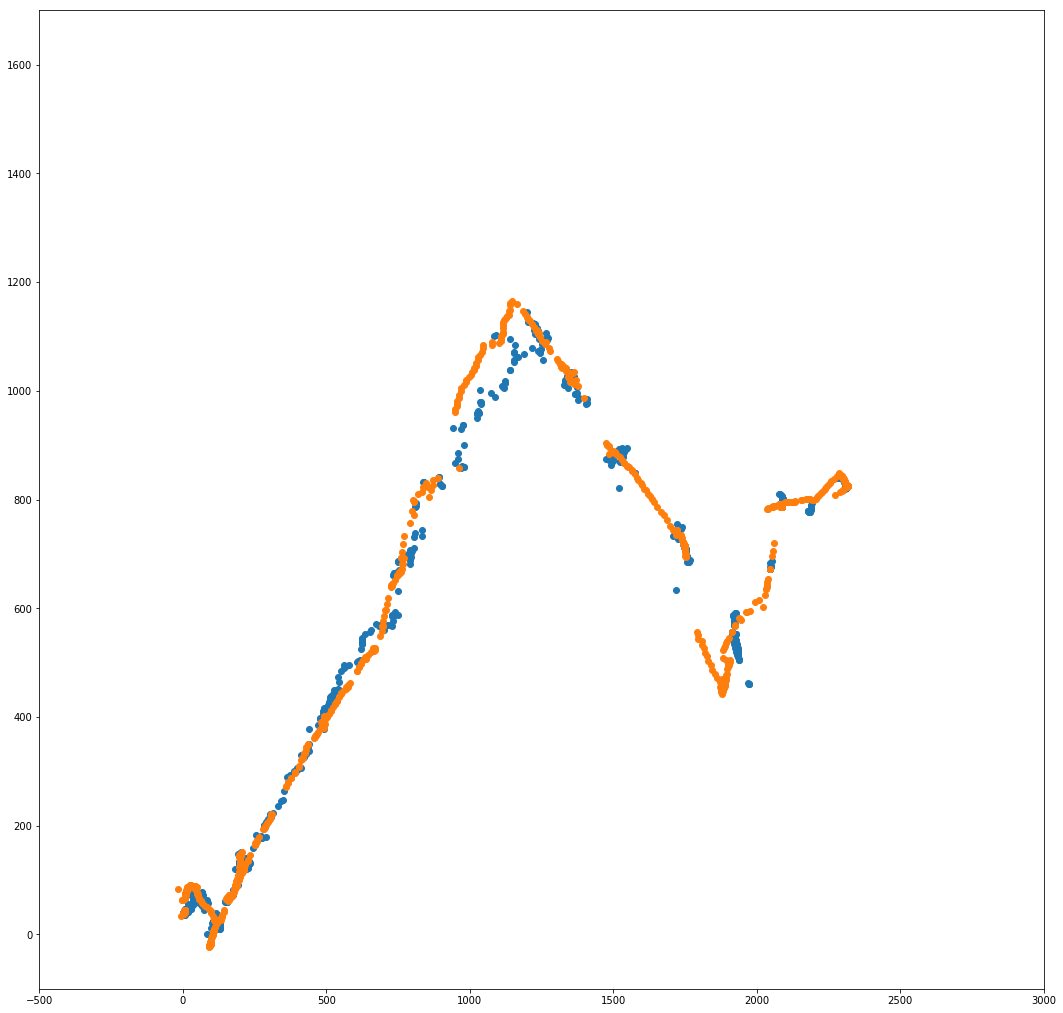

In [276]:
plt.figure(figsize=(18,18))
plt.scatter(slice[:,0], slice[:,1])
plt.scatter(l[:,0], l[:,1])
plt.axis([-500, 3000, -100, 1700])

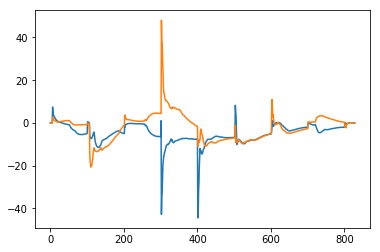

In [278]:
plt.plot(l[:,2])
plt.plot(l[:,3])